In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

In [9]:
portfolio_path = "../data/sample_portfolio.csv"
portfolio_df = pd.read_csv(portfolio_path)
portfolio_df


,Ticker,Weight
0,AAPL,0.3
1,MSFT,0.2
2,GOOGL,0.2
3,TSLA,0.1
4,JPM,0.1
5,XOM,0.1


In [10]:
import pandas as pd
import yfinance as yf

# Example portfolio list
portfolio_df = pd.DataFrame({
    'Ticker': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
})

# Extract ticker list
tickers = portfolio_df['Ticker'].tolist()

# Download historical prices
prices = yf.download(tickers, start="2022-01-01", end="2024-12-31")['Close']
print(prices.head())


C:\Users\admin\AppData\Local\Temp\ipykernel_15872\75939658.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start="2022-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  5 of 5 completed

Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2022-01-03  178.443115  170.404495  144.127121  325.038055  399.926666
2022-01-04  176.178406  167.522003  143.538666  319.464600  383.196655
2022-01-05  171.492096  164.356995  136.953629  307.201019  362.706665
2022-01-06  168.629303  163.253998  136.926300  304.773560  354.899994
2022-01-07  168.795929  162.554001  136.200150  304.928894  342.320007


In [11]:
tickers = portfolio_df['Ticker'].tolist()
prices = yf.download(tickers, start="2022-01-01", end="2024-12-31",)['Close']
prices.head()


C:\Users\admin\AppData\Local\Temp\ipykernel_15872\1190625469.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start="2022-01-01", end="2024-12-31",)['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2022-01-03,178.443115,170.404495,144.127121,325.038055,399.926666
2022-01-04,176.178406,167.522003,143.538666,319.464600,383.196655
2022-01-05,171.492096,164.356995,136.953629,307.201019,362.706665
2022-01-06,168.629303,163.253998,136.926300,304.773560,354.899994
2022-01-07,168.795929,162.554001,136.200150,304.928894,342.320007


In [12]:
returns = prices.pct_change().dropna()
returns.head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2022-01-04,-0.012691,-0.016916,-0.004083,-0.017147,-0.041833
2022-01-05,-0.026600,-0.018893,-0.045876,-0.038388,-0.053471
2022-01-06,-0.016693,-0.006711,-0.000200,-0.007902,-0.021523
2022-01-07,0.000988,-0.004288,-0.005303,0.000510,-0.035447
2022-01-10,0.000116,-0.006570,0.012061,0.000732,0.030342


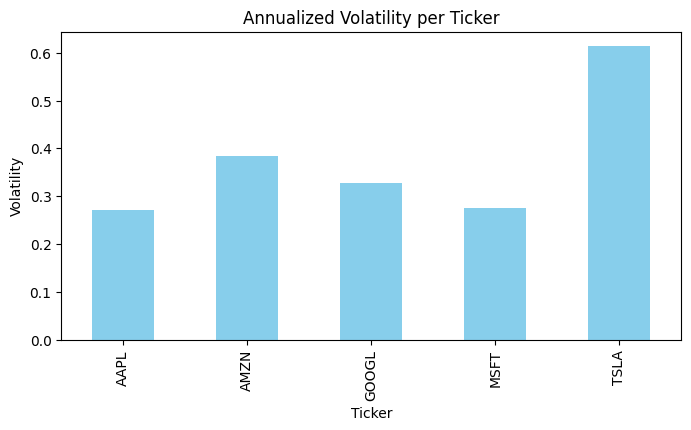

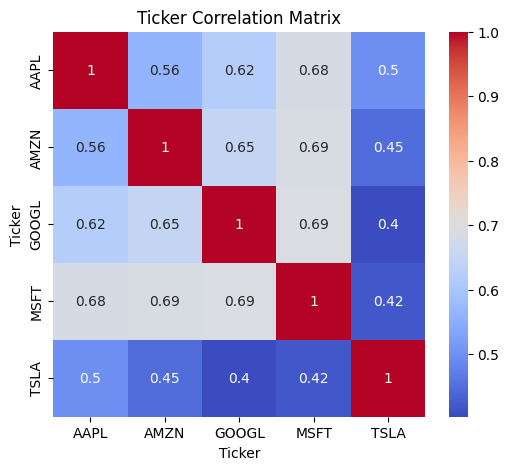

In [13]:
import numpy as np

# Volatility per ticker
volatility = returns.std() * np.sqrt(252)
plt.figure(figsize=(8,4))
volatility.plot(kind='bar', color='skyblue')
plt.title("Annualized Volatility per Ticker")
plt.ylabel("Volatility")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Ticker Correlation Matrix")
plt.show()

In [17]:
avg_corr = returns.corr().values[np.triu_indices(len(returns.columns), k=1)].mean()
cov_matrix = returns.cov()
weights = np.repeat(1/len(portfolio_df), len(portfolio_df))
portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
# If no 'Weight' column, assign equal weights
if 'Weight' not in portfolio_df.columns:
    portfolio_df['Weight'] = 1 / len(portfolio_df)

# Map sectors
sector_map = {
    'AAPL': 'Tech', 'MSFT': 'Tech', 'GOOGL': 'Tech',
    'TSLA': 'Consumer', 'JPM': 'Finance', 'XOM': 'Energy'
}
portfolio_df['Sector'] = portfolio_df['Ticker'].map(sector_map)

# Calculate sector weights and HHI
sector_weights = portfolio_df.groupby('Sector')['Weight'].sum()
hhi = (sector_weights**2).sum()

print("Sector Weights:\n", sector_weights)
print("HHI:", hhi)

# Example sector HHI
sector_map = {
    'AAPL': 'Tech', 'MSFT': 'Tech', 'GOOGL': 'Tech',
    'TSLA': 'Consumer', 'JPM': 'Finance', 'XOM': 'Energy'
}
portfolio_df['Sector'] = portfolio_df['Ticker'].map(sector_map)
sector_weights = portfolio_df.groupby('Sector')['Weight'].sum()
hhi = (sector_weights**2).sum()

print("Portfolio Volatility:", portfolio_vol)
print("Average Correlation:", avg_corr)
print("Sector HHI:", hhi)

Sector Weights:
 Sector
Consumer    0.2
Tech        0.6
Name: Weight, dtype: float64
HHI: 0.40000000000000013
Portfolio Volatility: 0.2983714054821259
Average Correlation: 0.5674080438381002
Sector HHI: 0.40000000000000013


In [18]:
X = pd.DataFrame({
    'avg_corr': [0.5, 0.8, 0.3],
    'hhi': [0.2, 0.6, 0.4],
    'volatility': [0.1, 0.3, 0.2]
})
y = ['Low', 'High', 'Medium']  # Risk labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 8. Train RandomForest Model
# ===============================
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Save model
joblib.dump(model, "../models/risk_model.pkl")
print("Model saved as risk_model.pkl")

Model Accuracy: 0.0
Model saved as risk_model.pkl


In [21]:
import numpy as np
import pandas as pd

# === Example: Assume you have a DataFrame with daily returns ===
# If you already have returns in a variable, replace this with your actual returns data
# Example:
# df['returns'] = model_predictions  # your strategy returns
# Or load from CSV:
# df = pd.read_csv("strategy_results.csv")
# df['returns'] = df['strategy_returns']

# For demo, we'll generate random returns
np.random.seed(42)
df = pd.read_csv("sample_portfolio.csv")
df['returns'] = df['strategy_returns']  # column with your daily returns


# === Risk Metrics Functions ===
def CAGR(returns):
    """Compound Annual Growth Rate"""
    cumulative_return = (1 + returns).prod()
    n_years = len(returns) / 252
    return cumulative_return ** (1 / n_years) - 1

def volatility(returns):
    """Annualized Volatility"""
    return returns.std() * np.sqrt(252)

def sharpe_ratio(returns, risk_free_rate=0.02):
    """Sharpe Ratio"""
    excess_return = CAGR(returns) - risk_free_rate
    return excess_return / volatility(returns)

def sortino_ratio(returns, risk_free_rate=0.02):
    """Sortino Ratio"""
    downside_returns = returns[returns < 0]
    excess_return = CAGR(returns) - risk_free_rate
    downside_vol = downside_returns.std() * np.sqrt(252)
    return excess_return / downside_vol if downside_vol != 0 else np.nan

def max_drawdown(returns):
    """Max Drawdown"""
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

def win_rate(returns):
    """Winning Days Percentage"""
    return len(returns[returns > 0]) / len(returns)

# === Calculate Metrics ===
metrics = {
    "CAGR": CAGR(df['returns']),
    "Volatility": volatility(df['returns']),
    "Sharpe Ratio": sharpe_ratio(df['returns']),
    "Sortino Ratio": sortino_ratio(df['returns']),
    "Max Drawdown": max_drawdown(df['returns']),
    "Win Rate": win_rate(df['returns'])
}

# === Display Metrics ===
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])
metrics_df['Value'] = metrics_df['Value'].apply(lambda x: f"{x:.2%}" if abs(x) < 10 else f"{x:.2f}")
display(metrics_df)


FileNotFoundError: [Errno 2] No such file or directory: 'sample_portfolio.csv'